# Bundestag Stammdaten ML 
TODO: Erklärung wo der Datensatz her kommt
TODO: Zielsetzung

In [1]:
# space for imports
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

## 1) Load data
### API request

In [12]:
import requests

url = "https://search.dip.bundestag.de/api/v1/person?apikey=rgsaY4U.oZRQKUHdJhF9qguHMkwCGIoLaqEcaHjYLF"
resp = requests.get(url)
data = resp.json()


In [13]:
list(data.values())[1]

[{'id': '847',
  'nachname': 'Pau',
  'vorname': 'Petra',
  'typ': 'Person',
  'wahlperiode': 14,
  'aktualisiert': '2024-04-05T11:21:36+02:00',
  'person_roles': [{'funktion': 'MdB',
    'fraktion': 'DIE LINKE',
    'nachname': 'Pau',
    'vorname': 'Petra',
    'wahlperiode_nummer': [16, 17, 18, 19, 20]},
   {'funktion': 'MdB',
    'fraktion': 'fraktionslos',
    'nachname': 'Pau',
    'vorname': 'Petra',
    'wahlperiode_nummer': [15, 20]},
   {'funktion': 'MdB',
    'fraktion': 'PDS',
    'nachname': 'Pau',
    'vorname': 'Petra',
    'wahlperiode_nummer': [14]}],
  'titel': 'Petra Pau, Bundestagsvizepräs.',
  'datum': '2024-05-15',
  'basisdatum': '1998-10-26'},
 {'id': '7559',
  'nachname': 'Bünger',
  'vorname': 'Clara',
  'typ': 'Person',
  'wahlperiode': 20,
  'aktualisiert': '2024-04-05T10:58:01+02:00',
  'person_roles': [{'funktion': 'MdB',
    'fraktion': 'fraktionslos',
    'nachname': 'Bünger',
    'vorname': 'Clara',
    'wahlperiode_nummer': [20]}],
  'titel': 'Clara Bü

In [14]:
json = pd.DataFrame.from_dict(list(data.values())[1]) 

In [15]:
json.head()

,id,nachname,vorname,typ,wahlperiode,aktualisiert,person_roles,titel,datum,basisdatum,namenszusatz
0,847,Pau,Petra,Person,14,2024-04-05T11:21:36+02:00,"[{'funktion': 'MdB', 'fraktion': 'DIE LINKE', ...","Petra Pau, Bundestagsvizepräs.",2024-05-15,1998-10-26,NaN
1,7559,Bünger,Clara,Person,20,2024-04-05T10:58:01+02:00,"[{'funktion': 'MdB', 'fraktion': 'fraktionslos...","Clara Bünger, MdB, DIE LINKE",2024-05-15,2022-01-14,NaN
2,7356,Latendorf,Ina,Person,20,2024-04-05T11:13:41+02:00,"[{'funktion': 'MdB', 'fraktion': 'fraktionslos...","Ina Latendorf, MdB, DIE LINKE",2024-05-15,2021-11-09,NaN
3,7302,Hennig-Wellsow,Susanne,Person,20,2024-04-05T11:11:24+02:00,"[{'funktion': 'MdB', 'fraktion': 'fraktionslos...","Susanne Hennig-Wellsow, MdB, DIE LINKE",2024-05-15,2021-12-07,NaN
4,7293,Gürpinar,Ates,Person,20,2024-04-05T11:06:06+02:00,"[{'funktion': 'MdB', 'fraktion': 'fraktionslos...","Ates Gürpinar, MdB, DIE LINKE",2024-05-15,2021-11-17,NaN


In [16]:
json.info()
json.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   nachname      100 non-null    object
 2   vorname       100 non-null    object
 3   typ           100 non-null    object
 4   wahlperiode   100 non-null    int64 
 5   aktualisiert  100 non-null    object
 6   person_roles  37 non-null     object
 7   titel         100 non-null    object
 8   datum         100 non-null    object
 9   basisdatum    100 non-null    object
 10  namenszusatz  1 non-null      object
dtypes: int64(1), object(10)
memory usage: 8.7+ KB


,wahlperiode
count,100.000000
mean,18.800000
std,1.333333
min,14.000000
25%,19.000000
50%,19.000000
75%,20.000000
max,20.000000


### XML File

In [17]:
filepath = "C:\\Dev\\uni\\malrn\\project\\data\\MdB-Stammdaten\\MDB_STAMMDATEN.XML"
mdb_name = pd.read_xml(filepath, parser="lxml", xpath="//NAME")
mdb_biographics = pd.read_xml(filepath, parser="lxml", xpath="//BIOGRAFISCHE_ANGABEN")
mdb_election_period = pd.read_xml(filepath, parser="lxml", xpath="//WAHLPERIODE")
mdb = pd.read_xml(filepath, parser="lxml", xpath="//MDB")

# MDB --> Namen, Biografischen Angaben, Wahlperioden[] --> all objects

In [18]:
mdb.head()

,ID,NAMEN,BIOGRAFISCHE_ANGABEN,WAHLPERIODEN
0,11000001,\n,\n,\n
1,11000002,\n,\n,\n
2,11000003,\n,\n,\n
3,11000004,\n,\n,\n
4,11000005,\n,\n,\n


In [19]:
mdb.info()
mdb_name.info()
mdb_biographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    4379 non-null   int64 
 1   NAMEN                 4379 non-null   object
 2   BIOGRAFISCHE_ANGABEN  4379 non-null   object
 3   WAHLPERIODEN          4379 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NACHNAME      4660 non-null   object
 1   VORNAME       4660 non-null   object
 2   ORTSZUSATZ    637 non-null    object
 3   ADEL          41 non-null     object
 4   PRAEFIX       86 non-null     object
 5   ANREDE_TITEL  1130 non-null   object
 6   AKAD_TITEL    1163 non-null   object
 7   HISTORIE_VON  4659 non-null   object
 8   HISTORIE_BI

**Because of the structure of the data, `pd.read_xml` does not return any valuable data**

### CSV

In [33]:
mdb_csv = pd.read_csv('C:/Dev/uni/malrn/project/data/mdb_data.csv',sep=";", encoding="latin-1")

## 2) First overview of the data and the data structure

In [34]:
mdb_csv.head()

,Unnamed: 0,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
0,1,Dr.,Manfred,Abelein,Dr. Manfred Abelein,männlich,20.10.1930,Stuttgart,NaN,17.01.2008,katholisch,keine Angaben,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",CDU,1,5,174.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
1,2,Dr.,Ernst,Achenbach,Dr. Ernst Achenbach,männlich,09.04.1909,Siegen,NaN,02.12.1991,evangelisch,"verheiratet, 3 Kinder",Rechtsanwalt und Notar,FDP,1,3,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
2,3,NaN,Annemarie,Ackermann,Annemarie Ackermann,weiblich,26.05.1913,Parabutsch,Jugoslawien,18.02.1994,katholisch,"verheiratet, 5 Kinder",Hilfsreferentin,CDU,1,2,NaN,Fraktion der Christlich Demokratischen Union/C...,Landesliste
3,4,Dr.,Else,Ackermann,Dr. Else Ackermann,weiblich,06.11.1933,Berlin,NaN,14.09.2019,evangelisch,ledig,Ärztin,CDU,1,11,NaN,Fraktion der Christlich Demokratischen Union/C...,Volkskammer
4,5,NaN,Ulrich,Adam,Ulrich Adam,männlich,09.06.1950,"Teterow, Kr. Teterow, Bezirk Neubrandenburg",NaN,NaN,evangelisch,"verheiratet, 2 Kinder","Mathematiker, Geschäftsführer",CDU,1,12,268.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl


In [21]:
mdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11618 non-null  int64  
 1   title          3061 non-null   object 
 2   first_name     11618 non-null  object 
 3   last_name      11618 non-null  object 
 4   full_name      11618 non-null  object 
 5   gender         11618 non-null  object 
 6   date_birth     11618 non-null  object 
 7   place_birth    11614 non-null  object 
 8   country_birth  213 non-null    object 
 9   date_death     5411 non-null   object 
 10  religion       11192 non-null  object 
 11  family_stat    11463 non-null  object 
 12  occupation     11618 non-null  object 
 13  party          11613 non-null  object 
 14  time           11618 non-null  int64  
 15  legislature    11618 non-null  int64  
 16  elect_distr    5970 non-null   float64
 17  faction        11618 non-null  object 
 18  mandat

There are multiple columns with null values. <br>
Values in columns like `place_birth`, `party` and `mandate_type`, where just a couple are missing, could be filled by researching the parliament member.

In [48]:
mdb_csv.describe()

,Unnamed: 0,time,legislature,elect_distr
count,11618.000000,11618.000000,11618.000000,5970.000000
mean,8286.502066,2.571355,10.507058,134.130151
std,6889.965642,1.707634,5.433358,86.298410
min,1.000000,1.000000,1.000000,1.000000
25%,2905.250000,1.000000,6.000000,56.000000
50%,6562.500000,2.000000,11.000000,130.000000
75%,11663.500000,3.000000,15.000000,204.000000
max,50933.000000,13.000000,19.000000,328.000000


### Missing values in place_birth, party and mandate_type

In [28]:
mdb_csv[mdb_csv['place_birth'].isnull()]

,Unnamed: 0,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
3357,3358,NaN,Patrick,Kurth,Patrick Kurth,männlich,06.10.1976,NaN,NaN,NaN,ohne Angaben,2 Kinder,Politikwissenschaftler M. A.,FDP,1,16,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
3564,3565,NaN,Annette,Sawade,Annette Sawade,weiblich,23.04.1953,NaN,NaN,NaN,evangelisch,"verheiratet, 3 Kinder",Diplom-Chemikerin,SPD,1,17,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
6500,7442,NaN,Patrick,Kurth,Patrick Kurth,männlich,06.10.1976,NaN,NaN,NaN,ohne Angaben,2 Kinder,Politikwissenschaftler M. A.,FDP,2,17,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
6650,7649,NaN,Annette,Sawade,Annette Sawade,weiblich,23.04.1953,NaN,NaN,NaN,evangelisch,"verheiratet, 3 Kinder",Diplom-Chemikerin,SPD,2,18,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste


There are only four values in the data set without any birth place. <br>
After a quick google search this value can be filled with `Sondershausen` in Patrick Kurth's case and with `Nordhausen` in Annette Sawade's case.

In [29]:
mdb_csv[mdb_csv['party'].isnull()]

,Unnamed: 0,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
574,575,NaN,Alfred,Frenzel,Alfred Frenzel,männlich,18.09.1899,Josefsthal,NaN,23.07.1968,ohne Angaben,keine Angaben,Glasschmelzer,NaN,1,2,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
1322,1323,Dr.,Heinrich,Leuchtgens,Dr. Heinrich Leuchtgens,männlich,31.10.1876,Birklar,NaN,21.03.1959,ohne Angaben,keine Angaben,"Lehrer, Volkswirt",NaN,1,1,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
2054,2055,Dr.,Helmuth,Schranz,Dr. Helmuth Schranz,männlich,07.01.1897,Haiger,NaN,07.05.1968,ohne Angaben,"verheiratet, 4 Kinder",Prokurist,NaN,1,2,NaN,Fraktion Deutsche Partei,Landesliste
4481,4659,NaN,Alfred,Frenzel,Alfred Frenzel,männlich,18.09.1899,Josefsthal,NaN,23.07.1968,ohne Angaben,keine Angaben,Glasschmelzer,NaN,2,3,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
5510,6139,Dr.,Helmuth,Schranz,Dr. Helmuth Schranz,männlich,07.01.1897,Haiger,NaN,07.05.1968,ohne Angaben,"verheiratet, 4 Kinder",Prokurist,NaN,2,3,NaN,Fraktion Deutsche Partei,Landesliste


According to Wikipedia Alfred Frenzel was a member of the SPD, Dr. Heinrich Leuchtgens was a member of his own party the NDP and Dr. Helmuth Schranz was a member of the DP.

In [31]:
mdb_csv[mdb_csv['mandate_type'].isnull()]

,Unnamed: 0,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
5969,6771,NaN,Werner,Kuhn,Werner Kuhn,männlich,19.05.1955,Zingst / Ostseebad,NaN,NaN,katholisch,"verheiratet, 3 Kinder",Dipl.-Ingenieur für Schiffstechnik,CDU,2,14,NaN,Fraktion der Christlich Demokratischen Union/C...,NaN


The value for the `mandate_type` can't be filled in Werner Kuhn's case for the election period 14. <br>
According to Wikipedia, he joined the Bundestag in the middle of the election period (August 2001) to fill the spot that Paul Krüger left vacant. <br>
Since Paul Krüger was elected via the Landesliste, this value will be used as the most representive for Werner Kuhn.

#### Missing values for country_birth, religion and family_stat

In [23]:
mdb_csv['country_birth'].value_counts() # no germany

country_birth
Österreich                             33
Türkei                                 15
Schweiz                                12
Niederlande                            11
CSFR                                   11
CSSR                                   11
Italien                                 9
Polen                                   9
USA                                     9
Frankreich                              8
Estland                                 7
Australien                              7
Ungarn                                  5
ehem. Deutsch-Ost-Afrika                5
Tschechoslowakei                        5
Ceylon                                  5
Jugoslawien                             5
Kroatien                                4
Oberösterreich                          4
Iran                                    4
Südwestafrika                           3
Tansania                                3
Rumänien                                3
Tansania (ehem. Deut

There is no birth country value for Germany, which means all null values can be replaced with `Germany`.

In [22]:
mdb_csv['religion'].value_counts() # keine Angaben as possible value

religion
evangelisch                  3405
ohne Angaben                 3274
katholisch                   2984
römisch-katholisch            828
evangelisch-lutherisch        366
konfessionslos                233
evangelisch-reformiert         34
Atheistin                      12
Islam                           9
religionslos                    9
evangelisch-freikirchlich       9
freireligiös                    8
muslimisch                      7
Atheist                         6
neuapostolisch                  1
protestantisch                  1
humanistisch                    1
griechisch-orthodox             1
alevitisch                      1
alt-katholisch                  1
orthodox                        1
russisch-orthodox               1
Name: count, dtype: int64

In [24]:
mdb_csv['family_stat'].value_counts() # no real value because of combination between relationship type and amount of children

family_stat
verheiratet, 2 Kinder                            2720
verheiratet, 3 Kinder                            1821
verheiratet                                      1717
verheiratet, 1 Kind                              1365
keine Angaben                                    1043
verheiratet, 4 Kinder                             887
ledig                                             425
verheiratet, 5 Kinder                             329
verheiratet, 6 Kinder                             178
2 Kinder                                          113
verwitwet, 2 Kinder                                77
1 Kind                                             76
geschieden, 2 Kinder                               71
geschieden, 1 Kind                                 69
verwitwet                                          63
ledig, 1 Kind                                      50
3 Kinder                                           50
geschieden, 3 Kinder                               38
verwitwet, 1 Kin

In [38]:
mdb_csv['party'].value_counts() 

party
SPD                      4247
CDU                      4150
FDP                      1035
CSU                       997
BÜNDNIS 90/DIE GRÜNEN     451
DIE LINKE.                296
AfD                        91
PDS                        77
GRÜNE                      51
DP                         37
Plos                       34
DIE GRÜNEN/BÜNDNIS 90      32
FU                         21
GB/ BHE                    20
KPD                        18
PDS/LL                     15
WAV                        14
DZP                         5
BP                          5
DSU                         5
CSUS                        4
DRP                         3
DPS                         2
DPB                         1
CVP                         1
SRP                         1
Name: count, dtype: int64

<Axes: xlabel='party'>

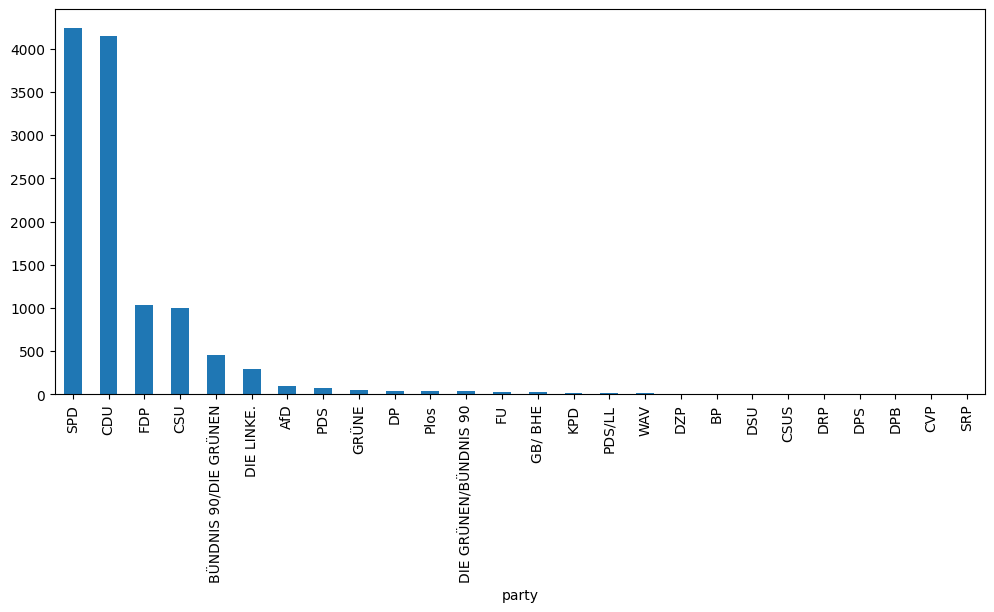

In [46]:
mdb_csv['party'].value_counts().plot(kind='bar', figsize=(12,5))

In [42]:
mdb_csv['faction'].value_counts()

faction
Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union          5089
Fraktion der Sozialdemokratischen Partei Deutschlands                             4244
Fraktion der Freien Demokratischen Partei                                         1052
Fraktion Bündnis 90/Die Grünen                                                     419
Fraktion DIE LINKE.                                                                269
Fraktion Die Grünen                                                                103
Alternative für Deutschland                                                         92
Gruppe der Partei des Demokratischen Sozialismus                                    55
Fraktion Deutsche Partei                                                            49
Fraktionslos                                                                        39
Fraktion der Partei des Demokratischen Sozialismus                                  39
Fraktion Gesamtdeutscher Block / Bl

<Axes: xlabel='faction'>

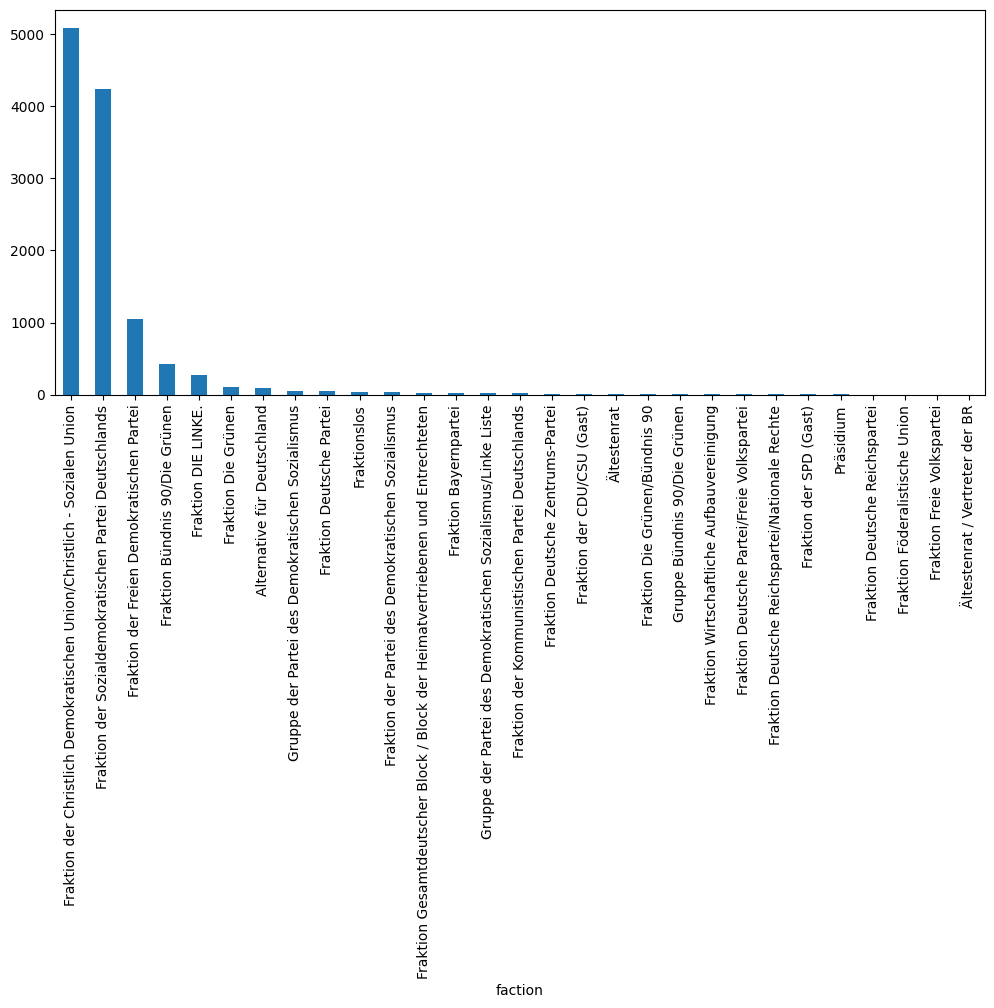

In [47]:
mdb_csv['faction'].value_counts().plot(kind='bar', figsize=(12,5))

## 3) Train-Test-Split

## 4) Correlation between different attributes and the result attribute

## 5) Transform Data 
Fill missing numerical values, scale numerical values and transform categories in machine readable values via encoders

## 6) Regression

## 7) Classifier

## 8) Validation
Check the accuracy_score, the confusion_matrix, n-fold cross validation or similar methods

## 9) Fine Tuning

## 10) Evaluation